### 1 - Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import itertools

### 2 - Load the Data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### Looking the shapes

In [3]:
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


### 3- Preprocessing of Data

#### Scaling x_train and x_test

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)

x_train shape :  (60000, 28, 28)
x_test shape :  (10000, 28, 28)


#### Changing the dimension of x_train and x_test

In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)

x_train shape :  (60000, 28, 28, 1)
x_test shape :  (10000, 28, 28, 1)


#### Finding number of classes

In [6]:
k = len(set(y_train))
print('Number of classes : ', k)

Number of classes :  10


### 4 - Building the Functional API Model

In [7]:
i = Input(shape = x_train[0].shape)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i, x)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

#### Compile and fitting

In [9]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 26s 5ms/step - loss: 0.5142 - accuracy: 0.8099 - val_loss: 0.3818 - val_accuracy: 0.8567
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3594 - accuracy: 0.8646 - val_loss: 0.3390 - val_accuracy: 0.8682
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3143 - accuracy: 0.8816 - val_loss: 0.3217 - val_accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2812 - accuracy: 0.8933 - val_loss: 0.3092 - val_accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2553 - accuracy: 0.9040 - val_loss: 0.3005 - val_accuracy: 0.8936
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2346 - accuracy: 0.9108 - val_loss: 0.3021 - val_accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2175 - accuracy: 0.9177 - val_loss: 0.3029 - val_accuracy

### 5 - Plotting model results

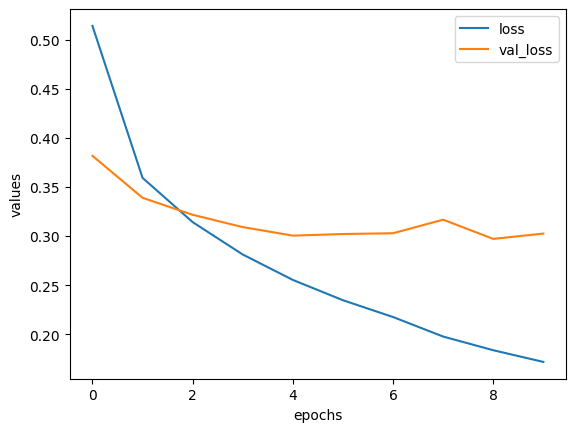

In [10]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

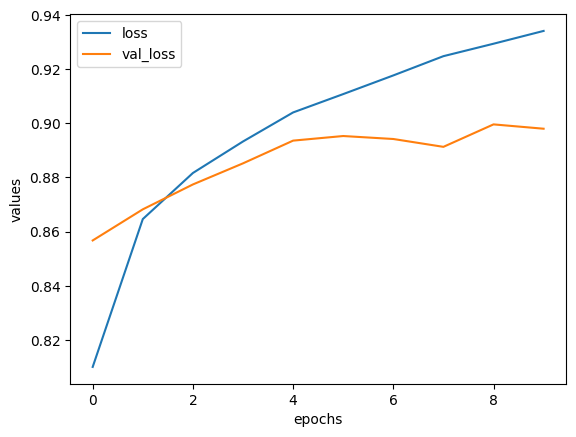

In [11]:
plt.plot(history.history['accuracy'], label = 'loss')
plt.plot(history.history['val_accuracy'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

#### Plot the confusion_matrix

313/313 [==============================] - 1s 2ms/step
confusion matrix, without normalization
[[855   1  23  10   3   0 101   0   7   0]
 [  1 979   0  12   5   0   2   0   1   0]
 [ 14   0 837   9  65   0  73   0   2   0]
 [ 20   4  21 881  45   0  28   0   1   0]
 [  0   0  42  11 872   0  73   0   2   0]
 [  1   0   0   1   0 965   0  19   2  12]
 [102   3  62  24 105   0 696   0   8   0]
 [  0   0   0   0   0  19   0 963   0  18]
 [  1   0   6   3   3   1  12   2 972   0]
 [  1   0   0   0   0   3   0  35   1 960]]
---------------------------------------------


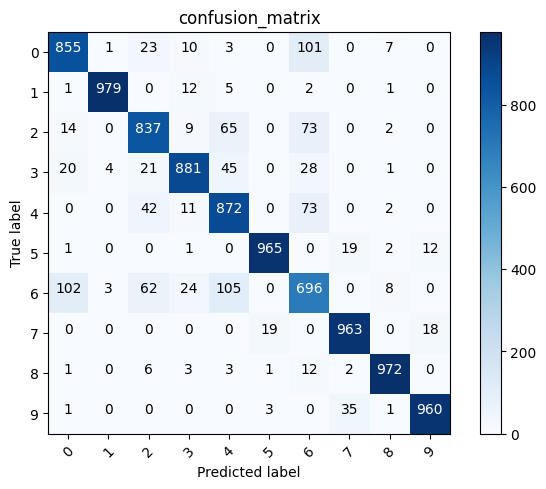

In [12]:
def plot_conf_matrix(cm, classes, normalize = False, title = 'confusion_matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')

  else:
    print('confusion matrix, without normalization')

  print(cm)
  print("---------------------------------------------")
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_conf_matrix(cm, list(range(10)))


#### Label mapping

In [13]:
labels = '''
T-shirt
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

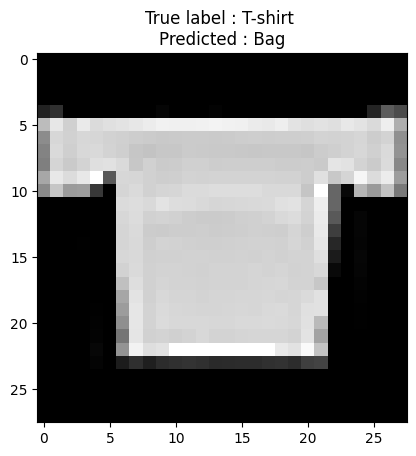

In [15]:
## show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));

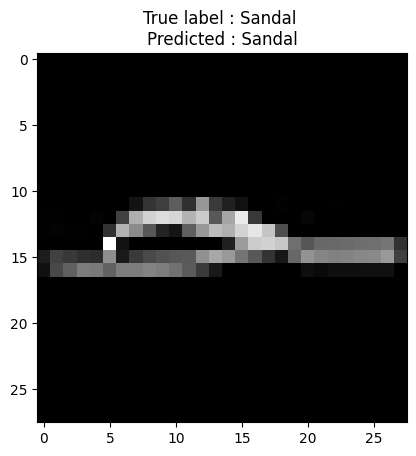

In [16]:
## show some classified examples
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));